In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import ControlBurn as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import RidgeClassifier as rc
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [3]:
df_rain = pd.read_csv('datasets/weatherAUS_clean.csv')
rain_feats = df_rain.columns.values
rain_x = df_rain[rain_feats[1:-1]]
rain_y = df_rain[rain_feats[-1]]
rain_x_tr, rain_x_te, rain_y_tr, rain_y_te = train_test_split(rain_x, rain_y, test_size=0.2)

In [4]:
# rain_norm_x = rain_x - rain_x.min()
# rain_norm_x /= (rain_norm_x.max() - rain_norm_x.min())
rain_norm_x = rain_x - rain_x.mean()
rain_norm_x_tr, rain_norm_x_te, rain_norm_y_tr, rain_norm_y_te = train_test_split(rain_norm_x, rain_y, test_size=0.2)

In [5]:
df_rain['RainTomorrow'].max()

1.0

In [6]:
rain_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_E,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W
0,13.4,22.9,0.6,24.666201,7.20069,44.0,20.0,24.0,71.0,22.0,...,0.0,6.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,4.0
1,7.4,25.1,0.0,24.666201,7.20069,44.0,4.0,22.0,44.0,25.0,...,0.0,4.0,4.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0
2,12.9,25.7,0.0,24.666201,7.20069,46.0,19.0,26.0,38.0,30.0,...,0.0,4.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,4.0
3,9.2,28.0,0.0,24.666201,7.20069,24.0,11.0,9.0,45.0,16.0,...,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,6.0,0.0
4,17.5,32.3,1.0,24.666201,7.20069,41.0,7.0,20.0,82.0,33.0,...,0.0,6.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0


In [7]:
rain_norm_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_E,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W
0,1.007883,-0.542506,-1.756095,11.25839,-0.287912,3.313458,4.970112,4.79261,3.314295,-28.79899,...,-1.469488,4.437154,-1.580598,-1.514377,-1.522596,4.617571,0.618491,-1.609254,-1.443485,2.434247
1,-4.992117,1.657494,-2.356095,11.25839,-0.287912,3.313458,-11.029888,2.79261,-23.685705,-25.79899,...,-1.469488,2.437154,2.419402,-1.514377,-1.522596,0.617571,-1.381509,0.390746,-1.443485,2.434247
2,0.507883,2.257494,-2.356095,11.25839,-0.287912,5.313458,3.970112,6.79261,-29.685705,-20.79899,...,-1.469488,2.437154,-1.580598,-1.514377,-1.522596,4.617571,-1.381509,0.390746,-1.443485,2.434247
3,-3.192117,4.557494,-2.356095,11.25839,-0.287912,-16.686542,-4.029888,-10.20739,-22.685705,-34.79899,...,1.530512,-1.562846,-1.580598,1.485623,1.477404,-1.382429,-1.381509,-1.609254,4.556515,-1.565753
4,5.107883,8.857494,-1.356095,11.25839,-0.287912,0.313458,-8.029888,0.79261,14.314295,-17.79899,...,-1.469488,4.437154,0.419402,-1.514377,2.477404,-1.382429,1.618491,-1.609254,-1.443485,1.434247


In [8]:
rain_norm_x.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_E,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W
count,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,...,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05,1.217900e+05
mean,1.400349e-13,2.120835e-13,-2.429887e-13,1.102549e-11,7.201489e-12,-1.004410e-15,-3.285801e-16,-9.035952e-16,3.584510e-16,-3.942961e-15,...,-1.941610e-16,-2.389673e-16,-1.120159e-16,-1.484211e-16,-1.344191e-16,-1.642900e-16,-5.227410e-17,1.344191e-16,1.530884e-16,6.720956e-17
std,6.336322e+00,7.140863e+00,8.482433e+00,9.921268e+00,2.807379e+00,1.339052e+01,8.321005e+00,8.587120e+00,1.905808e+01,2.093924e+01,...,1.921960e+00,1.966491e+00,2.016462e+00,1.929320e+00,1.924537e+00,1.872716e+00,1.882703e+00,1.942573e+00,1.882713e+00,1.961487e+00
min,-2.089212e+01,-2.824251e+01,-2.356095e+00,-1.340781e+01,-7.488602e+00,-3.368654e+01,-1.302989e+01,-1.720739e+01,-6.768570e+01,-5.079899e+01,...,-1.469488e+00,-1.562846e+00,-1.580598e+00,-1.514377e+00,-1.522596e+00,-1.382429e+00,-1.381509e+00,-1.609254e+00,-1.443485e+00,-1.565753e+00
25%,-4.592117e+00,-5.342506e+00,-2.356095e+00,-9.407811e+00,-2.879119e-01,-9.686542e+00,-6.029888e+00,-6.207390e+00,-1.168570e+01,-1.479899e+01,...,-1.469488e+00,-1.562846e+00,-1.580598e+00,-1.514377e+00,-1.522596e+00,-1.382429e+00,-1.381509e+00,-1.609254e+00,-1.443485e+00,-1.565753e+00
50%,-1.921168e-01,-4.425060e-01,-2.356095e+00,-4.407811e+00,-2.879119e-01,-1.686542e+00,-2.029888e+00,-2.073898e-01,1.314295e+00,2.010099e-01,...,-1.469488e+00,-1.562846e+00,-1.580598e+00,-1.514377e+00,-1.522596e+00,-1.382429e+00,-1.381509e+00,-1.609254e+00,-1.443485e+00,-1.565753e+00
75%,4.607883e+00,5.057494e+00,-1.556095e+00,1.125839e+01,1.611398e+00,7.313458e+00,4.970112e+00,4.792610e+00,1.431430e+01,1.420101e+01,...,1.530512e+00,1.437154e+00,1.419402e+00,1.485623e+00,1.477404e+00,1.617571e+00,1.618491e+00,1.390746e+00,1.556515e+00,1.434247e+00
max,2.150788e+01,2.465749e+01,3.652439e+02,6.899219e+01,7.011398e+00,9.431346e+01,7.197011e+01,6.779261e+01,3.231430e+01,4.920101e+01,...,4.530512e+00,4.437154e+00,4.419402e+00,4.485623e+00,4.477404e+00,4.617571e+00,4.618491e+00,4.390746e+00,4.556515e+00,4.434247e+00


In [9]:
rain_feats

array(['Unnamed: 0', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_E', 'WindGustDir_W',
       'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_E', 'WindDir9am_W',
       'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_E', 'WindDir3pm_W',
       'RainTomorrow'], dtype=object)

In [10]:
rain_y_te_true = rain_y_te[rain_y_te == 1]
rain_x_te_true = rain_x_te[rain_y_te == 1]
rain_y_te_false = rain_y_te[rain_y_te == 0]
rain_x_te_false = rain_x_te[rain_y_te == 0]
rain_norm_y_te_true = rain_norm_y_te[rain_norm_y_te == 1]
rain_norm_x_te_true = rain_norm_x_te[rain_norm_y_te == 1]
rain_norm_y_te_false = rain_norm_y_te[rain_norm_y_te == 0]
rain_norm_x_te_false = rain_norm_x_te[rain_norm_y_te == 0]

In [11]:
U, S, V = np.linalg.svd(rain_x_tr[:5000])
Un, Sn, Vn = np.linalg.svd(rain_norm_x_tr[:5000])

[1.01871765e+05 1.90976464e+03 1.15879746e+03 8.26733352e+02
 7.48107948e+02 7.03748656e+02 6.41603745e+02 4.34505615e+02
 3.97017708e+02 2.56660532e+02 2.29525490e+02 2.13176323e+02
 1.66994992e+02 1.53374017e+02 1.27793633e+02 1.21958264e+02
 1.14831094e+02 1.08380196e+02 1.00643091e+02 9.92210497e+01
 9.10559452e+01 8.81515822e+01 8.48538253e+01 7.22781172e+01
 5.13500491e+01 2.33146297e+01 1.88872662e+00 9.04671222e-12
 9.04671222e-12]


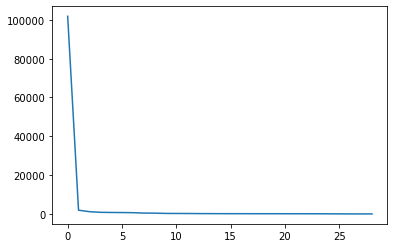

In [12]:
print(S)
plt.plot(S)
# demonstrate features selected by PCA would do poorly in RF but do well with lasso
# normalize every feature and try again

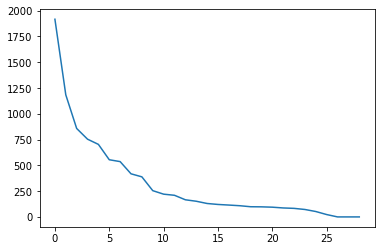

In [13]:
Sn
plt.plot(Sn)

In [14]:
clf = lr(penalty='l2').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te), clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

0.8462517448066343 0.4911660777385159 0.9468415784205257
Coefficients: [[ 0.01086999  0.01205396  0.02633325 -0.00186315 -0.11586732  0.06100182
  -0.01236817 -0.03129007  0.00428311  0.06114038  0.035983   -0.04356262
   0.04359885  0.08523157  0.01120818  0.01156805  0.01613054  0.01923202
  -0.01582267 -0.02269605  0.02119974  0.04654333 -0.03137222 -0.00307099
  -0.01018706  0.0420925  -0.0323019  -0.0272425   0.01936496]]


C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
clf = lr(penalty='l1', solver='liblinear').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te), clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

0.8468265046391329 0.4997210340338479 0.9451556819977872
Coefficients: [[-4.64765306e-03 -9.00831596e-03  8.16173012e-03 -2.53200899e-03
  -1.22340759e-01  5.78350452e-02 -1.60426410e-02 -2.88199868e-02
   3.54222999e-04  6.20407159e-02 -9.35553444e-03 -1.64120465e-02
   0.00000000e+00  1.17072827e-01  3.50028151e-03  4.92205414e-02
   5.29202678e-01  9.46140729e-01  9.61744677e-01  9.38922480e-01
   9.72375967e-01  9.93413604e-01  9.17573923e-01  9.53387675e-01
   9.27925551e-01  9.24194154e-01  8.26130169e-01  8.38315188e-01
   8.70486744e-01]]


C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
# run pca for different numbers of output features, see how loss changes
# comparison with lasso (ridge)
# and RF to see loss progression
rain_norm_x_tr.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_E,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W
count,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,...,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000,97432.000000
mean,0.002136,-0.001900,0.015990,-0.013480,-0.000092,0.025606,0.011803,0.005436,-0.022360,-0.013919,...,0.001517,0.001938,-0.003529,0.002763,-0.001576,0.002342,-0.003215,-0.001568,0.001451,0.003332
std,6.334151,7.147151,8.568361,9.923447,2.809895,13.419724,8.332865,8.598021,19.088748,20.938411,...,1.923809,1.968632,2.014627,1.931623,1.924905,1.874002,1.878680,1.941055,1.883230,1.962983
min,-20.892117,-28.242506,-2.356095,-13.407811,-7.488602,-33.686542,-13.029888,-17.207390,-67.685705,-50.798990,...,-1.469488,-1.562846,-1.580598,-1.514377,-1.522596,-1.382429,-1.381509,-1.609254,-1.443485,-1.565753
25%,-4.592117,-5.342506,-2.356095,-9.407811,-0.287912,-9.686542,-6.029888,-6.207390,-11.685705,-14.798990,...,-1.469488,-1.562846,-1.580598,-1.514377,-1.522596,-1.382429,-1.381509,-1.609254,-1.443485,-1.565753
50%,-0.192117,-0.442506,-2.356095,-4.407811,-0.287912,-1.686542,-2.029888,-0.207390,1.314295,0.201010,...,-1.469488,-1.562846,-1.580598,-1.514377,-1.522596,-1.382429,-1.381509,-1.609254,-1.443485,-1.565753
75%,4.607883,5.057494,-1.556095,11.258390,1.611398,7.313458,4.970112,4.792610,14.314295,14.201010,...,1.530512,1.437154,1.419402,1.485623,1.477404,1.617571,1.618491,1.390746,1.556515,1.434247
max,21.507883,24.657494,365.243905,68.992189,7.011398,94.313458,71.970112,56.792610,32.314295,49.201010,...,4.530512,4.437154,4.419402,4.485623,4.477404,4.617571,4.618491,4.390746,4.556515,4.434247


In [17]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 30):
    pca = PCA(n_components=i)
    pcan = PCA(n_components=i)
    pca.fit(rain_x_tr)
    pcan.fit(rain_norm_x_tr)
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te_true), rain_y_te_true))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te_true), rain_norm_y_te_true))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

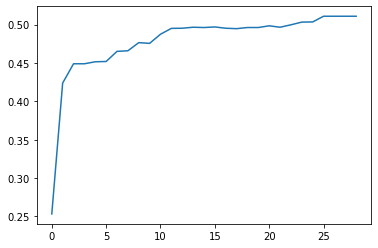

In [18]:
plt.plot(scores)

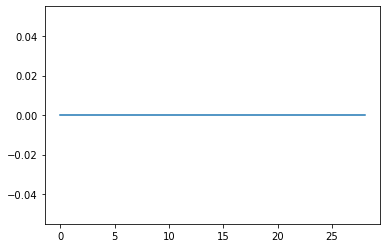

In [19]:
plt.plot(scoresn)

In [20]:
cmatricesn

[array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=int64),
 array([[18909,     0],
        [ 5449,     0]], dtype=